In [ ]:
!pip install stegano

In [ ]:
# PRELIMINARIES
import os
from stegano import lsb #USED FOR PNG IMAGE
import skimage.io as sk
import matplotlib.pyplot as plt
from scipy import spatial
from tqdm import tqdm

from PIL import Image
from random import shuffle


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
image = sk.imread("../input/alaska2-image-steganalysis/JMiPOD/00005.jpg")

In [ ]:
secret = lsb.hide("../input/alaska2-image-steganalysis/JMiPOD/00005.jpg", "I will be there but you can't find me even if I'm a very very very long sentence")
secret.save("encoded.png")

In [ ]:
img1 = sk.imread("../input/alaska2-image-steganalysis/JMiPOD/00005.jpg")
img2 = sk.imread("/kaggle/working/encoded.png")

fig,ax = plt.subplots(1,2,figsize=(18,8))
    
ax[0].imshow(img1)
ax[1].imshow(img2)

In [ ]:
print(lsb.reveal("/kaggle/working/encoded.png"))

In [ ]:
img2.shape

In [ ]:
vec1 = np.reshape(img1,(512*512*3))
vec2 = np.reshape(img2,(512*512*3))

In [ ]:
print(1 - spatial.distance.cosine(vec1,vec2)) #Cosine Similarity

In [ ]:
print(spatial.distance.cosine(vec2,vec1)) #Cosine Dissimilarity

In [ ]:
BASE_PATH = "/kaggle/input/alaska2-image-steganalysis"
train_imageids = pd.Series(os.listdir(BASE_PATH + '/Cover')).sort_values(ascending=True).reset_index(drop=True)
test_imageids = pd.Series(os.listdir(BASE_PATH + '/Test')).sort_values(ascending=True).reset_index(drop=True)

In [ ]:
cover_images_path = pd.Series(BASE_PATH + '/Cover/' + train_imageids ).sort_values(ascending=True)
JMIPOD_images_path = pd.Series(BASE_PATH + '/JMiPOD/'+train_imageids).sort_values(ascending=True)
JUNIWARD_images_path = pd.Series(BASE_PATH + '/JUNIWARD/'+train_imageids).sort_values(ascending=True)
UERD_images_path = pd.Series(BASE_PATH + '/UERD/'+train_imageids).sort_values(ascending=True)
test_images_path = pd.Series(BASE_PATH + '/Test/'+test_imageids).sort_values(ascending=True)
ss = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')

In [ ]:
#VISUALIZING SOME IMAGES FROM COVER SECTION
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
k=0
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        img = sk.imread(cover_images_path[k])
        col.imshow(img)
        col.set_title(cover_images_path[k])
        k=k+1
plt.suptitle('Samples from Cover Images', fontsize=14)
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))
for i in range(3):
    '''
    If you want to print more images just change the values in range and ncols in subplot
    
    '''
    cvimg = sk.imread(cover_images_path[i])
    uniimg = sk.imread(JUNIWARD_images_path[i])
    jpodimg = sk.imread(JMIPOD_images_path[i])
    uerdimg = sk.imread(UERD_images_path[i])
    
    ax[i,0].imshow(cvimg)
    ax[i,0].set_title('Cover_IMG'+train_imageids[i])
    ax[i,1].imshow(uniimg)
    ax[i,1].set_title('JNIWARD_IMG'+train_imageids[i])
    ax[i,2].imshow(jpodimg)
    ax[i,2].set_title('JMiPOD_IMG'+train_imageids[i])
    ax[i,3].imshow(uerdimg)
    ax[i,3].set_title('UERD_IMG'+train_imageids[i])

In [ ]:
img_cover = sk.imread(cover_images_path[0])
img_jmipod = sk.imread(JMIPOD_images_path[0])
img_juniward = sk.imread(JUNIWARD_images_path[0])
img_uerd = sk.imread(UERD_images_path[0])


fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
ax[0,0].imshow(img_jmipod)
ax[0,1].imshow((img_cover == img_jmipod).astype(int)[:,:,0])
ax[0,1].set_title(f'{train_imageids[k]} Channel 0')

ax[0,2].imshow((img_cover == img_jmipod).astype(int)[:,:,1])
ax[0,2].set_title(f'{train_imageids[k]} Channel 1')
ax[0,3].imshow((img_cover == img_jmipod).astype(int)[:,:,2])
ax[0,3].set_title(f'{train_imageids[k]} Channel 2')
ax[0,0].set_ylabel('JMiPOD', rotation=90, size='large', fontsize=14)


ax[1,0].imshow(img_juniward)
ax[1,1].imshow((img_cover == img_juniward).astype(int)[:,:,0])
ax[1,2].imshow((img_cover == img_juniward).astype(int)[:,:,1])
ax[1,3].imshow((img_cover == img_juniward).astype(int)[:,:,2])
ax[1,0].set_ylabel('JUNIWARD', rotation=90, size='large', fontsize=14)

ax[2,0].imshow(img_uerd)
ax[2,1].imshow((img_cover == img_uerd).astype(int)[:,:,0])
ax[2,2].imshow((img_cover == img_uerd).astype(int)[:,:,1])
ax[2,3].imshow((img_cover == img_uerd).astype(int)[:,:,2])
ax[2,0].set_ylabel('UERD', rotation=90, size='large', fontsize=14)

plt.suptitle('Pixel Deviation from Cover Image', fontsize=14)

plt.show()


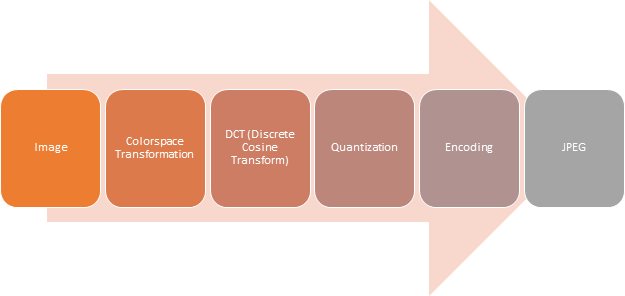

* Firstly the image is converted into YCbCr from RGB channels. YCbCr and RGB are both colorspaces having different channels where YCbCr consists three channels as Luminance(Y) , Cb(Cb is blue minus luma (B-Y)) ,  Cr(Cr is red minus luma (R-Y)). 

* Then DCT is applied on the pixels of these channels , using DCT coeff ,

* The image encoded using JPEG algorithm stays in YCbCr colorspace untill it is decoded by an Image viewer software. When a JPEG is read it is decoded and converted back to RGB colorspace to be rendered on screen 

In [ ]:
fig,ax = plt.subplots(3,4,figsize=(20,12))

for i,paths in enumerate(cover_images_path[:3]):
    image = Image.open(paths)
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Cover'+train_imageids[i])
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')

In [ ]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
plt.tight_layout()


im1 = Image.open(cover_images_path[0])
im2 = Image.open(JUNIWARD_images_path[0])
im3 = Image.open(JMIPOD_images_path[0])
im4 = Image.open(UERD_images_path[0])

for i,image in enumerate([im1,im2,im3,im4]):
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Image')
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')

In [ ]:
! git clone https://github.com/dwgoon/jpegio

In [ ]:
!pip install jpegio/.
import jpegio as jio

In [ ]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
plt.tight_layout()

for i,path in enumerate([cover_images_path[0],JUNIWARD_images_path[0],JMIPOD_images_path[0],UERD_images_path[0]]):
    
    image = Image.open(path)
    jpeg = jio.read(path)
    DCT_Y = jpeg.coef_arrays[0]
    DCT_Cr = jpeg.coef_arrays[1]
    DCT_Cb = jpeg.coef_arrays[2]
    
    
    ax[i,0].imshow(image)
    ax[i,0].set_title('Image')
    ax[i,1].imshow(DCT_Y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(DCT_Cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(DCT_Cr)
    ax[i,3].set_title('Cr:Chroma Red')

In [ ]:
coverDCT = np.zeros([512,512,3])
stegoDCT = np.zeros([512,512,3])
jpeg = jio.read(cover_images_path[0])
stego_juni = jio.read(JUNIWARD_images_path[0])

In [ ]:
coverDCT[:,:,0] = jpeg.coef_arrays[0] ; coverDCT[:,:,1] = jpeg.coef_arrays[1] ; coverDCT[:,:,2] = jpeg.coef_arrays[2]
stegoDCT[:,:,0] = stego_juni.coef_arrays[0] ; stegoDCT[:,:,1] = stego_juni.coef_arrays[1] ; stegoDCT[:,:,2] = stego_juni.coef_arrays[2]

DCT_diff = coverDCT - stegoDCT
# So since they are not the same Images the DCT_diff would not be zero
print(len(DCT_diff[np.where(DCT_diff!=0)]))
print(np.unique(DCT_diff))
plt.figure(figsize=(16,10))
plt.imshow( abs(DCT_diff) )
plt.show()

In [ ]:
coverPixels = np.array(Image.open(cover_images_path[0])).astype('float')
stegoPixels = np.array(Image.open(JUNIWARD_images_path[0])).astype('float')

pixelsDiff = coverPixels - stegoPixels

# So since they are not the same Images the pixels_diff would not be zero
print(len(pixelsDiff[np.where(pixelsDiff!=0)]))
print(np.unique(pixelsDiff))
plt.figure(figsize=(16,10))
plt.imshow( abs(pixelsDiff) )
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,12))
ax[0].imshow(abs(DCT_diff))
ax[1].imshow(abs(pixelsDiff))